# Value-based prediction

In [1]:
import os

import seaborn as sns
from lqsvg.experiment import plot
from lqsvg.experiment.utils import wandb_runs_dataframe
from matplotlib import pyplot as plt

/Users/angelolovatto/Library/Caches/pypoetry/virtualenvs/lqsvg-G_e_Olvw-py3.8/lib/python3.8/site-packages/ray/autoscaler/_private/cli_logger.py:57: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  warnings.warn(


## Matplotlib setup

Latex presets ([ref](https://jwalton.info/Embed-Publication-Matplotlib-Latex/))

In [2]:
from functools import partial

plot.create_latex_style()
set_size = partial(plot.latex_size, width="thesis")

In [3]:
print(*plot.available_styles())

Solarize_Light2 _classic_test_patch bmh classic dark_background fast fivethirtyeight ggplot grayscale seaborn seaborn-bright seaborn-colorblind seaborn-dark seaborn-dark-palette seaborn-darkgrid seaborn-deep seaborn-muted seaborn-notebook seaborn-paper seaborn-pastel seaborn-poster seaborn-talk seaborn-ticks seaborn-white seaborn-whitegrid tableau-colorblind10 tex


In [4]:
print(f"Your style sheets are located at: {plot.STYLE_PATH}")

Your style sheets are located at: /Users/angelolovatto/Library/Caches/pypoetry/virtualenvs/lqsvg-G_e_Olvw-py3.8/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib


In [5]:
# Using seaborn's style
# plt.style.use("seaborn")
sns.set()
# With LaTex fonts
plt.style.use("tex")

In [6]:
def figpath(name: str) -> str:
    return os.path.join("images", name + ".pdf")


def savefig(fig, name):
    return plot.save_pdf_tight(fig, figpath(name))

## TD(0)

In [7]:
DATA = wandb_runs_dataframe(
    "angelovtt/ch5",
    configs={"polyak": 0.995},
    tags=["ValueLearning", "9.30.0"],
)
DATA.head()

,trainer/global_step,val/grad_acc,val/bootstrap/relative_qval_err,_step,val/action_grad_acc,_runtime,epoch,val/bootstrap/action_grad_acc,val/relative_vval_err,_timestamp,...,summary/val/bootstrap/action_grad_acc,summary/controllability,summary/train/grad_acc,summary/val/relative_vval_err,summary/train/bootstrap/relative_qval_err,summary/trainable_parameters,summary/val/action_grad_acc,summary/val/grad_acc,summary/train/relative_vval_err,summary/val/bootstrap/relative_qval_err
0,0,0.482922,6.206344,0,0.607343,5,0,0.577971,35.23204,1633021724,...,0.613839,True,0.555313,4.78824,0.751732,2100,0.828548,0.655059,4.459551,0.903581
1,99,NaN,NaN,2,NaN,9,0,NaN,NaN,1633021728,...,0.613839,True,0.555313,4.78824,0.751732,2100,0.828548,0.655059,4.459551,0.903581
2,149,NaN,NaN,3,NaN,12,0,NaN,NaN,1633021731,...,0.613839,True,0.555313,4.78824,0.751732,2100,0.828548,0.655059,4.459551,0.903581
3,199,NaN,NaN,4,NaN,14,0,NaN,NaN,1633021733,...,0.613839,True,0.555313,4.78824,0.751732,2100,0.828548,0.655059,4.459551,0.903581
4,249,NaN,NaN,5,NaN,17,0,NaN,NaN,1633021736,...,0.613839,True,0.555313,4.78824,0.751732,2100,0.828548,0.655059,4.459551,0.903581


In [8]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9960 entries, 0 to 9959
Data columns (total 63 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   trainer/global_step                        9960 non-null   int64  
 1   val/grad_acc                               1249 non-null   float64
 2   val/bootstrap/relative_qval_err            1249 non-null   float64
 3   _step                                      9960 non-null   int64  
 4   val/action_grad_acc                        1249 non-null   float64
 5   _runtime                                   9960 non-null   int64  
 6   epoch                                      9960 non-null   int64  
 7   val/bootstrap/action_grad_acc              1249 non-null   float64
 8   val/relative_vval_err                      1249 non-null   float64
 9   _timestamp                                 9960 non-null   int64  
 10  train/action_grad_acc   

In [9]:
DATA["exploration"] = DATA["config/exploration/type"]

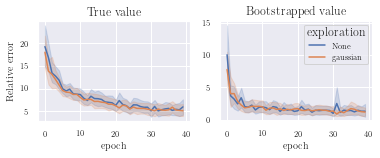

In [10]:
fig, (ax0, ax1) = plt.subplots(1, 2, sharex=True, figsize=set_size(subplots=(1, 2)))
sns.lineplot(
    ax=ax0,
    data=DATA,
    x="epoch",
    y="val/relative_vval_err",
    hue="exploration",
    #     units="config/seed",
    #     estimator=None,
    legend=False,
)
ax0.set_ylabel("Relative error")
ax0.set_title("True value")

sns.lineplot(
    ax=ax1,
    data=DATA,
    x="epoch",
    y="val/bootstrap/relative_qval_err",
    hue="exploration",
    #     units="config/seed",
    #     estimator=None,
)
ax1.set_ylabel(None)
ax1.set_title("Bootstrapped value")

savefig(fig, "value-based_value_errors")

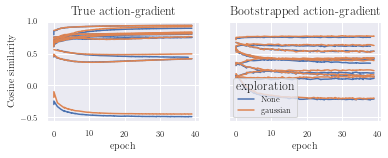

In [11]:
fig, (ax0, ax1) = plt.subplots(
    1, 2, sharex=True, sharey=True, figsize=set_size(subplots=(1, 2))
)

sns.lineplot(
    ax=ax0,
    data=DATA,
    x="epoch",
    y="val/action_grad_acc",
    hue="exploration",
    units="config/seed",
    estimator=None,
    legend=False,
)
ax0.set_ylabel("Cosine similarity")
ax0.set_title("True action-gradient")

sns.lineplot(
    ax=ax1,
    data=DATA,
    x="epoch",
    y="val/bootstrap/action_grad_acc",
    hue="exploration",
    units="config/seed",
    estimator=None,
)
ax1.set_title("Bootstrapped action-gradient")

savefig(fig, "value-based_action-gradient_acc")

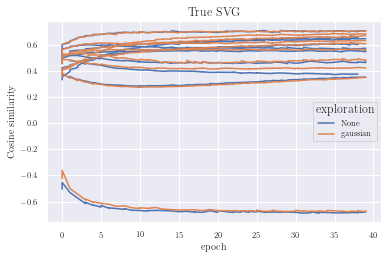

In [12]:
fig, ax = plt.subplots(figsize=set_size())

sns.lineplot(
    ax=ax,
    data=DATA,
    x="epoch",
    y="val/grad_acc",
    hue="exploration",
    units="config/seed",
    estimator=None,
)
ax.set_ylabel("Cosine similarity")
ax.set_title("True SVG")

savefig(fig, "value-based_gradient_acc")

## MAGE

In [13]:
MAGE = wandb_runs_dataframe(
    "angelovtt/ch5", configs={"learning_rate": 1e-2}, tags=["MAGEPrediction", "10.3.0"]
)
MAGE.head()

,trainer/global_step,val/grad_acc,val/bootstrap/relative_qval_err,_step,val/action_grad_acc,_runtime,epoch,val/bootstrap/action_grad_acc,val/relative_vval_err,_timestamp,...,summary/grad_2.0_norm_qval.q_values.1.const_epoch,summary/grad_2.0_norm_policy.K_epoch,summary/grad_2.0_norm_qval.q_values.1.linear_epoch,summary/grad_2.0_norm_qval.q_values.0.linear_epoch,summary/train/relative_vval_err,summary/train/loss,summary/trainable_parameters,summary/grad_2.0_norm_qval.q_values.1.const_step,summary/trainer/global_step,summary/val/grad_acc
0,0,0.472576,10.67005,0,0.610782,4,0,0.579545,34.919476,1633281386,...,0.727397,92446.890625,4.227736,3.823398,2.111768,491.980774,2100,0.5421,28160,0.726853
1,49,NaN,NaN,1,NaN,8,0,NaN,NaN,1633281390,...,0.727397,92446.890625,4.227736,3.823398,2.111768,491.980774,2100,0.5421,28160,0.726853
2,99,NaN,NaN,2,NaN,12,0,NaN,NaN,1633281394,...,0.727397,92446.890625,4.227736,3.823398,2.111768,491.980774,2100,0.5421,28160,0.726853
3,199,NaN,NaN,4,NaN,20,0,NaN,NaN,1633281402,...,0.727397,92446.890625,4.227736,3.823398,2.111768,491.980774,2100,0.5421,28160,0.726853
4,249,NaN,NaN,5,NaN,23,0,NaN,NaN,1633281405,...,0.727397,92446.890625,4.227736,3.823398,2.111768,491.980774,2100,0.5421,28160,0.726853


In [14]:
MAGE["exploration"] = MAGE["config/exploration/type"]

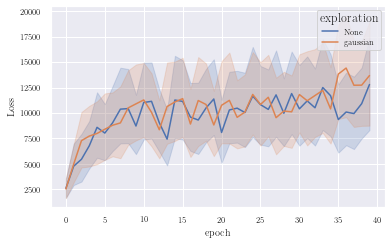

In [15]:
fig, ax = plt.subplots(figsize=set_size())

sns.lineplot(
    ax=ax,
    data=MAGE,
    x="epoch",
    y="train/loss",
    hue="exploration",
)
ax.set_ylabel("Loss")

savefig(fig, "mage_loss")

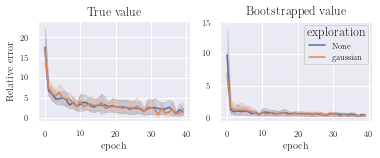

In [16]:
fig, (ax0, ax1) = plt.subplots(1, 2, sharex=True, figsize=set_size(subplots=(1, 2)))

sns.lineplot(
    ax=ax0,
    data=MAGE,
    x="epoch",
    y="val/relative_vval_err",
    hue="exploration",
    legend=False,
)
ax0.set_ylabel("Relative error")
ax0.set_title("True value")

sns.lineplot(
    ax=ax1,
    data=MAGE,
    x="epoch",
    y="val/bootstrap/relative_qval_err",
    hue="exploration",
)
ax1.set_ylabel(None)
ax1.set_title("Bootstrapped value")

savefig(fig, "mage_value_errors")

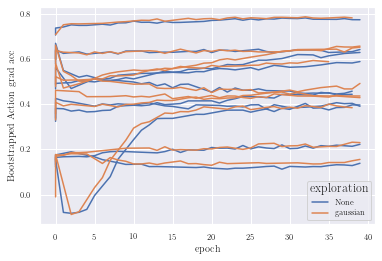

In [17]:
ax = sns.lineplot(
    data=MAGE,
    x="epoch",
    y="val/bootstrap/action_grad_acc",
    hue="exploration",
    units="config/seed",
    estimator=None,
)
ax.set_ylabel("Bootstrapped Action grad acc")
plt.show()

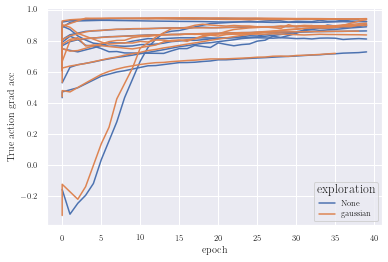

In [18]:
ax = sns.lineplot(
    data=MAGE,
    x="epoch",
    y="val/action_grad_acc",
    hue="exploration",
    units="config/seed",
    estimator=None,
)
ax.set_ylabel("True action grad acc")
plt.show()

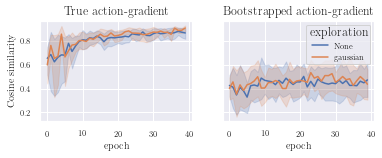

In [19]:
fig, (ax0, ax1) = plt.subplots(
    1, 2, sharex=True, sharey=True, figsize=set_size(subplots=(1, 2))
)

sns.lineplot(
    ax=ax0,
    data=MAGE,
    x="epoch",
    y="val/action_grad_acc",
    hue="exploration",
    legend=False,
)
ax0.set_ylabel("Cosine similarity")
ax0.set_title("True action-gradient")

sns.lineplot(
    ax=ax1,
    data=MAGE,
    x="epoch",
    y="val/bootstrap/action_grad_acc",
    hue="exploration",
)
ax1.set_title("Bootstrapped action-gradient")

savefig(fig, "mage_action-gradient_acc")

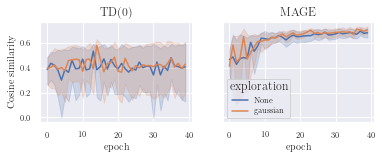

In [20]:
fig, (ax0, ax1) = plt.subplots(
    1, 2, sharex=True, sharey=True, figsize=set_size(subplots=(1, 2))
)

sns.lineplot(
    ax=ax0,
    data=DATA,
    x="epoch",
    y="val/grad_acc",
    hue="exploration",
    legend=False,
)
ax0.set_ylabel("Cosine similarity")
ax0.set_title("TD(0)")

sns.lineplot(
    ax=ax1,
    data=MAGE,
    x="epoch",
    y="val/grad_acc",
    hue="exploration",
)
ax1.set_title("MAGE")

savefig(fig, "td_vs_mage_gradient_acc")

# 17/10/21

## TD(0)

In [22]:
DATA = wandb_runs_dataframe(
    "angelovtt/ch5",
    configs={"loss": "TD(1)"},
    tags=["ValueBasedPrediction", "10.17.0"],
)
DATA.head()

,trainer/global_step,val/grad_acc,val/bootstrap/relative_qval_err,_step,val/bootstrap/obs_grad_acc,val/action_grad_acc,val/relative_qval_err,_runtime,val/obs_grad_acc,epoch,...,summary/controllability,summary/test/action_grad_acc,summary/val/action_grad_acc,summary/passive_eigvals,summary/epoch,summary/train/obs_grad_acc,summary/val/bootstrap/action_grad_acc,summary/val/relative_vval_err,summary/train/bootstrap/obs_grad_acc,summary/train/relative_vval_err
0,0,0.472702,0.690388,0,0.7149,0.606172,0.954009,4,0.727089,0,...,True,0.835624,0.837645,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",29,0.925968,0.618592,2.553865,0.623755,2.742015
1,49,NaN,NaN,1,NaN,NaN,NaN,7,NaN,0,...,True,0.835624,0.837645,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",29,0.925968,0.618592,2.553865,0.623755,2.742015
2,99,NaN,NaN,2,NaN,NaN,NaN,9,NaN,0,...,True,0.835624,0.837645,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",29,0.925968,0.618592,2.553865,0.623755,2.742015
3,149,NaN,NaN,3,NaN,NaN,NaN,12,NaN,0,...,True,0.835624,0.837645,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",29,0.925968,0.618592,2.553865,0.623755,2.742015
4,199,NaN,NaN,4,NaN,NaN,NaN,14,NaN,0,...,True,0.835624,0.837645,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",29,0.925968,0.618592,2.553865,0.623755,2.742015


In [23]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9680 entries, 0 to 9679
Data columns (total 80 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   trainer/global_step                        9680 non-null   int64  
 1   val/grad_acc                               1220 non-null   float64
 2   val/bootstrap/relative_qval_err            1220 non-null   float64
 3   _step                                      9680 non-null   int64  
 4   val/bootstrap/obs_grad_acc                 1220 non-null   float64
 5   val/action_grad_acc                        1220 non-null   float64
 6   val/relative_qval_err                      1220 non-null   float64
 7   _runtime                                   9680 non-null   int64  
 8   val/obs_grad_acc                           1220 non-null   float64
 9   epoch                                      9680 non-null   int64  
 10  val/bootstrap/action_gra

In [24]:
DATA["exploration"] = DATA["config/exploration/type"]

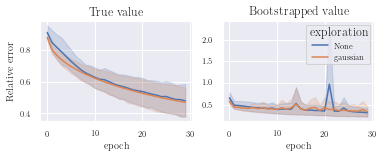

In [25]:
fig, (ax0, ax1) = plt.subplots(1, 2, sharex=True, figsize=set_size(subplots=(1, 2)))
sns.lineplot(
    ax=ax0,
    data=DATA,
    x="epoch",
    y="val/relative_qval_err",
    hue="exploration",
    legend=False,
)
ax0.set_ylabel("Relative error")
ax0.set_title("True value")

sns.lineplot(
    ax=ax1,
    data=DATA,
    x="epoch",
    y="val/bootstrap/relative_qval_err",
    hue="exploration",
)
ax1.set_ylabel(None)
ax1.set_title("Bootstrapped value")

savefig(fig, "value-based_value_errors")

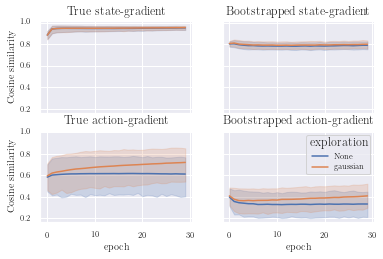

In [36]:
fig, axis = plt.subplots(
    2, 2, sharex=True, sharey=True, figsize=set_size(subplots=(2, 2))
)

sns.lineplot(
    ax=axis[0][0],
    data=DATA,
    x="epoch",
    y="val/obs_grad_acc",
    hue="exploration",
    legend=False,
)
axis[0][0].set_ylabel("Cosine similarity")
axis[0][0].set_title("True state-gradient")

sns.lineplot(
    ax=axis[0][1],
    data=DATA,
    x="epoch",
    y="val/bootstrap/obs_grad_acc",
    hue="exploration",
    legend=False,
)
axis[0][1].set_title("Bootstrapped state-gradient")

sns.lineplot(
    ax=axis[1][0],
    data=DATA,
    x="epoch",
    y="val/action_grad_acc",
    hue="exploration",
    legend=False,
)
axis[1][0].set_ylabel("Cosine similarity")
axis[1][0].set_title("True action-gradient")

sns.lineplot(
    ax=axis[1][1],
    data=DATA,
    x="epoch",
    y="val/bootstrap/action_grad_acc",
    hue="exploration",
)
axis[1][1].set_title("Bootstrapped action-gradient")

savefig(fig, "value-based_decomp_gradient_acc")

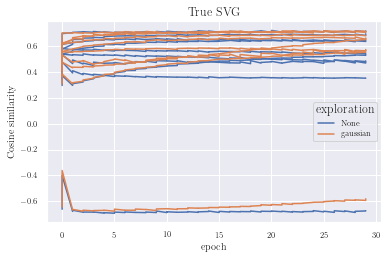

In [27]:
fig, ax = plt.subplots(figsize=set_size())

sns.lineplot(
    ax=ax,
    data=DATA,
    x="epoch",
    y="val/grad_acc",
    hue="exploration",
    units="config/seed",
    estimator=None,
)
ax.set_ylabel("Cosine similarity")
ax.set_title("True SVG")

savefig(fig, "value-based_gradient_acc")

## MAGE

In [28]:
MAGE = wandb_runs_dataframe(
    "angelovtt/ch5", configs={"loss": "MAGE"}, tags=["ValueBasedPrediction", "10.17.0"]
)
MAGE.head()

,trainer/global_step,val/grad_acc,val/bootstrap/relative_qval_err,_step,val/bootstrap/obs_grad_acc,val/action_grad_acc,val/relative_qval_err,_runtime,val/obs_grad_acc,epoch,...,summary/trainer/global_step,summary/val/relative_vval_err,summary/train/bootstrap/action_grad_acc,summary/test/bootstrap/action_grad_acc,summary/controllability,summary/train/bootstrap/obs_grad_acc,summary/train/relative_vval_err,summary/val/bootstrap/obs_grad_acc,summary/test/grad_acc,summary/val/grad_acc
0,0,0.47193,0.677103,0,0.713843,0.606417,0.957596,4,0.722109,0,...,21120,2.650213,0.682125,0.636366,True,0.760047,2.836669,0.700993,0.721577,0.72496
1,49,NaN,NaN,1,NaN,NaN,NaN,8,NaN,0,...,21120,2.650213,0.682125,0.636366,True,0.760047,2.836669,0.700993,0.721577,0.72496
2,99,NaN,NaN,2,NaN,NaN,NaN,11,NaN,0,...,21120,2.650213,0.682125,0.636366,True,0.760047,2.836669,0.700993,0.721577,0.72496
3,149,NaN,NaN,3,NaN,NaN,NaN,14,NaN,0,...,21120,2.650213,0.682125,0.636366,True,0.760047,2.836669,0.700993,0.721577,0.72496
4,199,NaN,NaN,4,NaN,NaN,NaN,17,NaN,0,...,21120,2.650213,0.682125,0.636366,True,0.760047,2.836669,0.700993,0.721577,0.72496


In [29]:
MAGE["exploration"] = MAGE["config/exploration/type"]

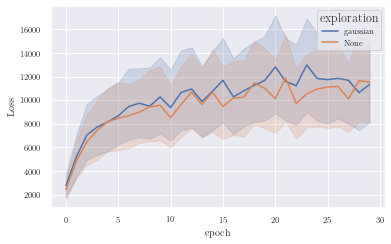

In [30]:
fig, ax = plt.subplots(figsize=set_size())

sns.lineplot(
    ax=ax,
    data=MAGE,
    x="epoch",
    y="train/loss",
    hue="exploration",
)
ax.set_ylabel("Loss")

savefig(fig, "mage_loss")

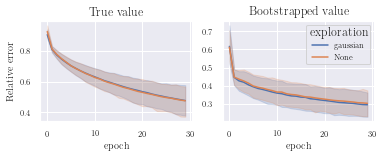

In [31]:
fig, (ax0, ax1) = plt.subplots(1, 2, sharex=True, figsize=set_size(subplots=(1, 2)))
sns.lineplot(
    ax=ax0,
    data=MAGE,
    x="epoch",
    y="val/relative_qval_err",
    hue="exploration",
    legend=False,
)
ax0.set_ylabel("Relative error")
ax0.set_title("True value")

sns.lineplot(
    ax=ax1,
    data=MAGE,
    x="epoch",
    y="val/bootstrap/relative_qval_err",
    hue="exploration",
)
ax1.set_ylabel(None)
ax1.set_title("Bootstrapped value")

savefig(fig, "value-based_value_errors")

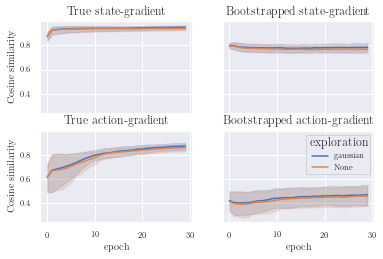

In [37]:
fig, axis = plt.subplots(
    2, 2, sharex=True, sharey=True, figsize=set_size(subplots=(2, 2))
)

sns.lineplot(
    ax=axis[0][0],
    data=MAGE,
    x="epoch",
    y="val/obs_grad_acc",
    hue="exploration",
    legend=False,
)
axis[0][0].set_ylabel("Cosine similarity")
axis[0][0].set_title("True state-gradient")

sns.lineplot(
    ax=axis[0][1],
    data=MAGE,
    x="epoch",
    y="val/bootstrap/obs_grad_acc",
    hue="exploration",
    legend=False,
)
axis[0][1].set_title("Bootstrapped state-gradient")

sns.lineplot(
    ax=axis[1][0],
    data=MAGE,
    x="epoch",
    y="val/action_grad_acc",
    hue="exploration",
    legend=False,
)
axis[1][0].set_ylabel("Cosine similarity")
axis[1][0].set_title("True action-gradient")

sns.lineplot(
    ax=axis[1][1],
    data=MAGE,
    x="epoch",
    y="val/bootstrap/action_grad_acc",
    hue="exploration",
)
axis[1][1].set_title("Bootstrapped action-gradient")

savefig(fig, "value-based_decomp_gradient_acc")

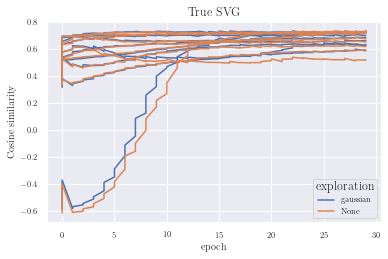

In [33]:
fig, ax = plt.subplots(figsize=set_size())

sns.lineplot(
    ax=ax,
    data=MAGE,
    x="epoch",
    y="val/grad_acc",
    hue="exploration",
    units="config/seed",
    estimator=None,
)
ax.set_ylabel("Cosine similarity")
ax.set_title("True SVG")

savefig(fig, "value-based_gradient_acc")

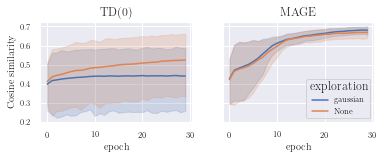

In [34]:
fig, (ax0, ax1) = plt.subplots(
    1, 2, sharex=True, sharey=True, figsize=set_size(subplots=(1, 2))
)

sns.lineplot(
    ax=ax0,
    data=DATA,
    x="epoch",
    y="val/grad_acc",
    hue="exploration",
    legend=False,
)
ax0.set_ylabel("Cosine similarity")
ax0.set_title("TD(0)")

sns.lineplot(
    ax=ax1,
    data=MAGE,
    x="epoch",
    y="val/grad_acc",
    hue="exploration",
)
ax1.set_title("MAGE")

savefig(fig, "td_vs_mage_gradient_acc")